1  **Sentimental analysis using NLTK-ML-Task-3**

In [1]:
 '''Sentiment analysis, also known as opinion mining, is the process of using␣
 ↪natural language processing (NLP) techniques
 to determine the sentiment or emotional tone expressed in text data.
 When applied to social media data, sentiment analysis can provide valuable␣
 ↪insights into public opinion, customer feedback,
 brand perception, and more. Here's a brief overview of sentiment analysis using␣
 ↪social media data:
 '''

"Sentiment analysis, also known as opinion mining, is the process of using␣\n↪natural language processing (NLP) techniques\nto determine the sentiment or emotional tone expressed in text data.\nWhen applied to social media data, sentiment analysis can provide valuable␣\n↪insights into public opinion, customer feedback,\nbrand perception, and more. Here's a brief overview of sentiment analysis using␣\n↪social media data:\n"

In [2]:
 '''Use a dataset of tweets or Facebook posts and
 perform sentiment analysis to determine the
 overall sentiment of the posts.'''

'Use a dataset of tweets or Facebook posts and\nperform sentiment analysis to determine the\noverall sentiment of the posts.'

In [3]:
 '''
 panda,numpy,matplotlib,seaborn,sklearn are the basic libraries used in the
 email spam filtering
 natural language tool kit used to study the data which means a mail
 and visualized the data in the different graphical form(pictorial representation
 '''

'\npanda,numpy,matplotlib,seaborn,sklearn are the basic libraries used in the\nemail spam filtering\nnatural language tool kit used to study the data which means a mail\nand visualized the data in the different graphical form(pictorial representation\n'

 **Packages required for the analysis**
    
    • nltk: natural language tool kit used for text analysis
    • pandas : used for anlayse dataframe
    • matplotlib and seborn: used for plotting

In [4]:
pip install vadersentiment

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [6]:
import nltk

In [37]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\modem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
import numpy as np
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk import PorterStemmer
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

$step-1$:

1.1 **Reading the data**

In phase one we alreday created a flow to get amazon iphine reviews and save
the data in csv format, the same data we are using here

In [39]:
df=pd.read_csv("C:\\Users\\modem\\OneDrive\\Desktop\\python sessions\\technohacks\\Tweets.csv")
df.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [40]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [41]:
df.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

In [42]:
df.shape

(14640, 15)

In [43]:
df.isnull().sum()
# understanding any null/missing values are present
# Our main Column here is Review Title which having reviews information
# We can see below it has 7 missing values
# out of 284 we have 7 missing values

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [44]:
df=df.dropna()
# dropping missing values

In [45]:
df.isnull().sum()
# after dropping we are checking still any missing value are there
# There is no missing values

tweet_id                        0
airline_sentiment               0
airline_sentiment_confidence    0
negativereason                  0
negativereason_confidence       0
airline                         0
airline_sentiment_gold          0
name                            0
negativereason_gold             0
retweet_count                   0
text                            0
tweet_coord                     0
tweet_created                   0
tweet_location                  0
user_timezone                   0
dtype: int64

In [46]:
display(df.shape)
display(df.info())

(2, 15)

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 4206 to 9536
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      2 non-null      int64  
 1   airline_sentiment             2 non-null      object 
 2   airline_sentiment_confidence  2 non-null      float64
 3   negativereason                2 non-null      object 
 4   negativereason_confidence     2 non-null      float64
 5   airline                       2 non-null      object 
 6   airline_sentiment_gold        2 non-null      object 
 7   name                          2 non-null      object 
 8   negativereason_gold           2 non-null      object 
 9   retweet_count                 2 non-null      int64  
 10  text                          2 non-null      object 
 11  tweet_coord                   2 non-null      object 
 12  tweet_created                 2 non-null      object 
 13  tweet_lo

None

In [47]:
# redefining dataset for analysis
df = df[['airline_sentiment','text']]
df

,airline_sentiment,text
4206,negative,@united So what do you offer now that my fligh...
9536,negative,@USAirways Seriously doubt that as I am still ...


In [48]:
# by above we can see the realtionship between the airline_sentiment and the 
# text of reviews.....

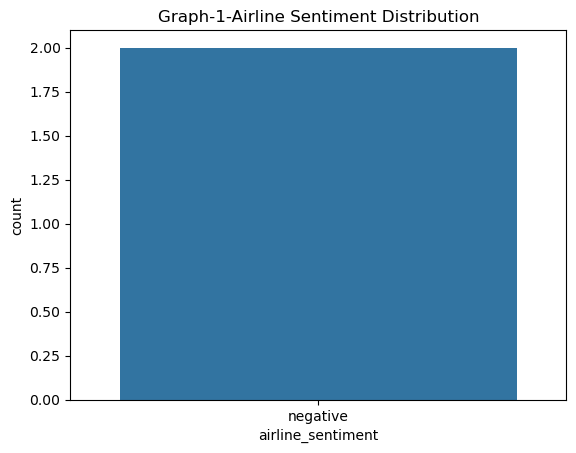

In [50]:
# airline_sentiment distributionn
sns.countplot(data=df,x='airline_sentiment')
plt.title('Graph-1-Airline Sentiment Distribution')
plt.show()



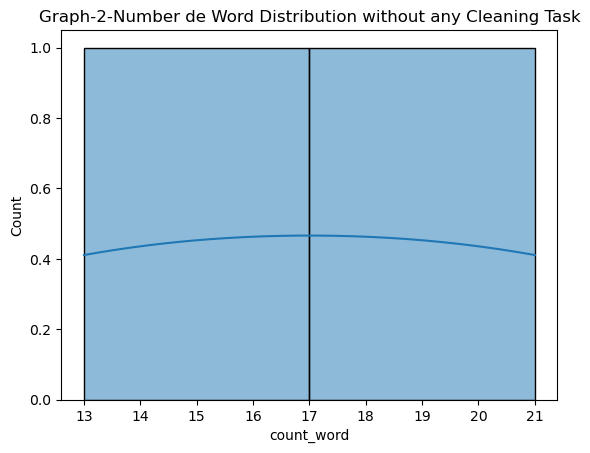

In [20]:
# creating a new column counting the number of word in each tweets
 
df['count_word'] = df['text'].apply(lambda x : len(x.split(' ')))
sns.histplot(data = df , x='count_word',kde=True)
plt.title('Graph-2-Number de Word Distribution without any Cleaning Task')
plt.show()

In [21]:
 #word distribution---without cleaning the data

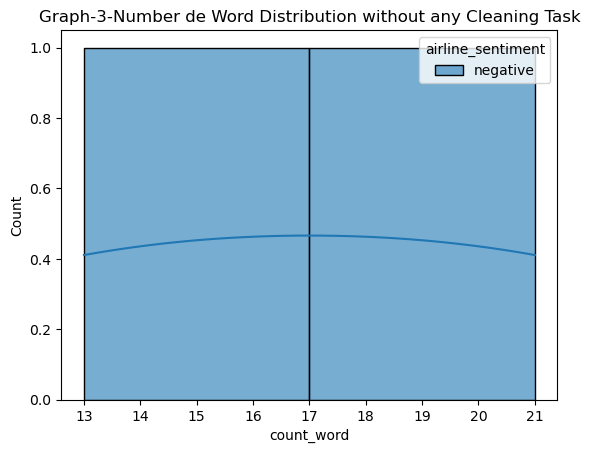

In [22]:
sns.histplot(data = df , x='count_word',hue='airline_sentiment',alpha=0.6,
             kde=True)
plt.title('Graph-3-Number de Word Distribution without any Cleaning Task')
plt.show()

In [23]:
#using the box plots to visulaize the words at tweets more better......

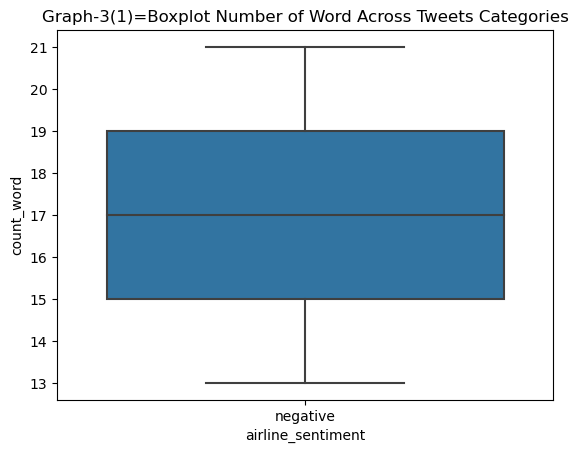

In [24]:
sns.boxplot(data = df , y='count_word',x='airline_sentiment')
plt.title('Graph-3(1)=Boxplot Number of Word Across Tweets Categories')
plt.show()

In [25]:
#lets see the negative tweets

In [26]:
df.loc[np.logical_or(df['count_word']>35,df['count_word']<=5),:]

,airline_sentiment,text,count_word


**Preprocessing the data:**
 
    Punctuation Removal
 
    StopWord Removal

    Numeric Values Removal

    Stemming

    Tokenization

In [27]:
 # import preprocessing libraries
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [28]:
# punctuation Removal
def remove_punctuation(text):
    return re.sub(r'[^\w\s]','',text)
 
#stopword removal
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    filter_tokens = [word for word in tokens if word.lower() not in stop_words]
    return " ".join(filter_tokens)

#remove numeric
def remove_numeric(text):
    return re.sub(r'\d+','',text)

#Stemming
def apply_stemming(text):
    stemmer = PorterStemmer()
    tokens = word_tokenize(text)
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return " ".join(stemmed_tokens)
 
def remove_mentions(text):
    return re.sub(r'@\w+','',text)

In [29]:
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

def apply_stemming(text):
    stemmer = PorterStemmer()
    tokens = word_tokenize(text)
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return " ".join(stemmed_tokens)

input_text = "walking throw the street, a passenger walked toward me, talking about a walked chicken on the streets"
stemmed_text = apply_stemming(input_text)
print(stemmed_text)

walk throw the street , a passeng walk toward me , talk about a walk chicken on the street


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\modem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [30]:
# sample stemming
apply_stemming('walking throw the street , a passenger walked toward me,talking about a walked chicken on the streets')

'walk throw the street , a passeng walk toward me , talk about a walk chicken on the street'

In [31]:
# General Preprocessing Function
def text_preprocessing(text):
    sentence = remove_mentions(text)
    sentence = remove_punctuation(sentence)
    sentence = remove_stopwords(sentence)
    sentence = remove_numeric(sentence)
    sentence = apply_stemming(sentence)
    return sentence

In [32]:
text_preprocessing('walking throw the street , a passenger walked toward me,talking about a walked chicken on the streets')

'walk throw street passeng walk toward metalk walk chicken street'

In [33]:
 df.loc[:,'new_text'] = df['text'].apply(lambda x : text_preprocessing(x))

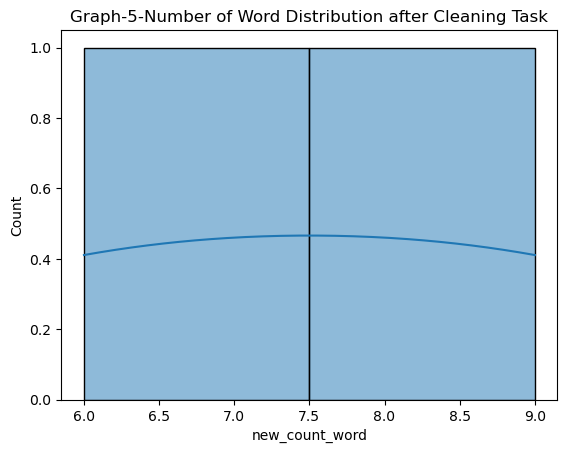

In [34]:
df.loc[:,'new_count_word'] = df['new_text'].apply(lambda x : len(x.split(' ')))
sns.histplot(data = df , x='new_count_word',kde=True)
plt.title('Graph-5-Number of Word Distribution after Cleaning Task')
plt.show()

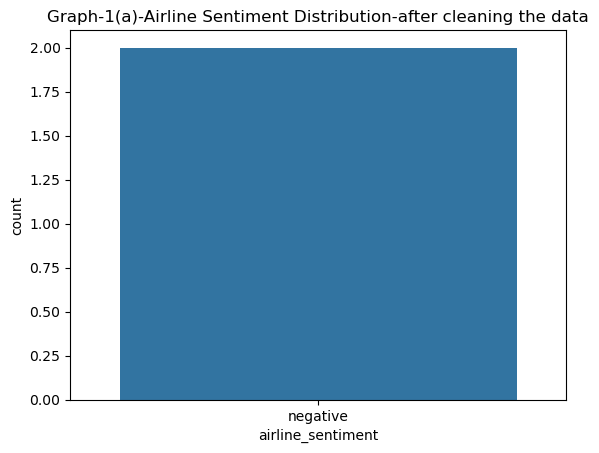

In [35]:
 # airline_sentiment distributionn
sns.countplot(data=df,x='airline_sentiment')
plt.title('Graph-1(a)-Airline Sentiment Distribution-after cleaning the data')
plt.show()

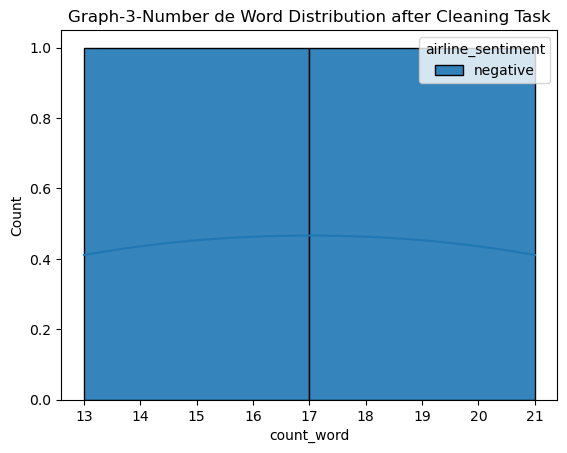

In [36]:
sns.histplot(data = df , x='count_word',hue='airline_sentiment',alpha=0.9,
             kde=True)
plt.title('Graph-3-Number de Word Distribution after Cleaning Task')
plt.show()